In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [4]:
diab = pd.read_csv('diabetes.csv')
diab.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
diab.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# Visualization

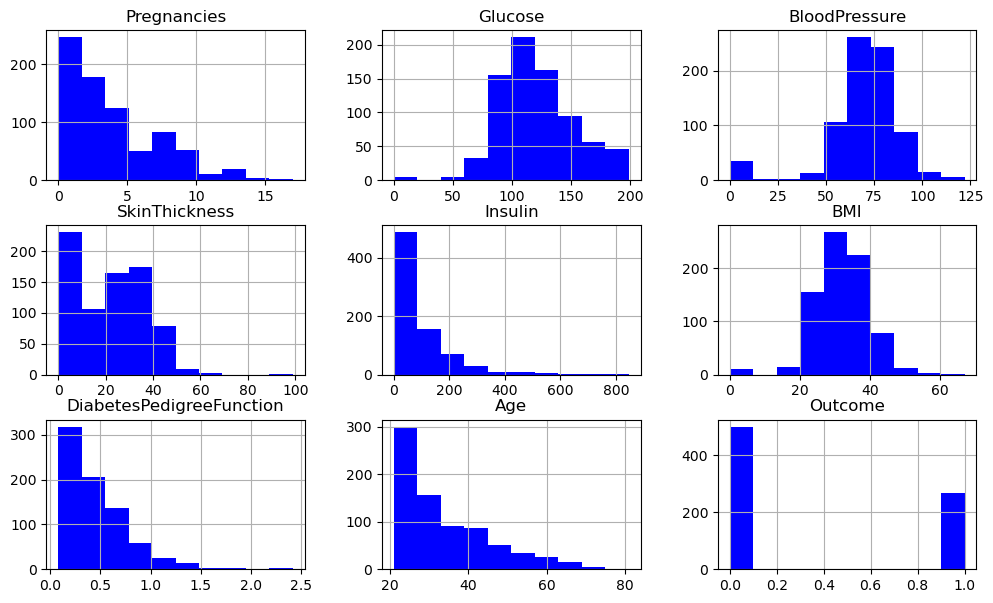

In [9]:
diab.hist(figsize = (12,7), color = "Blue")
plt.show()

In [10]:
# Box

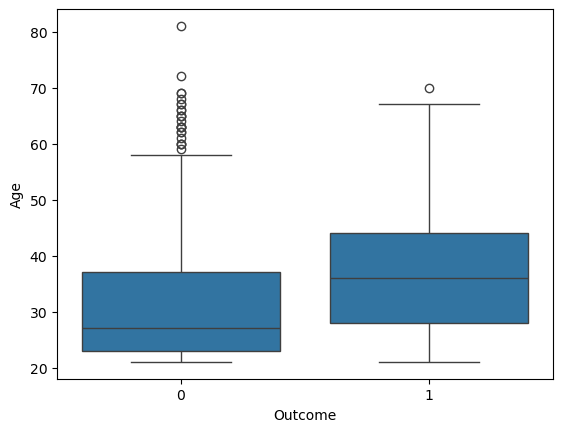

In [11]:
sns.boxplot(x="Outcome", y = "Age", data = diab)
plt.show()

In [12]:
# Correlation heatmap


<Axes: >

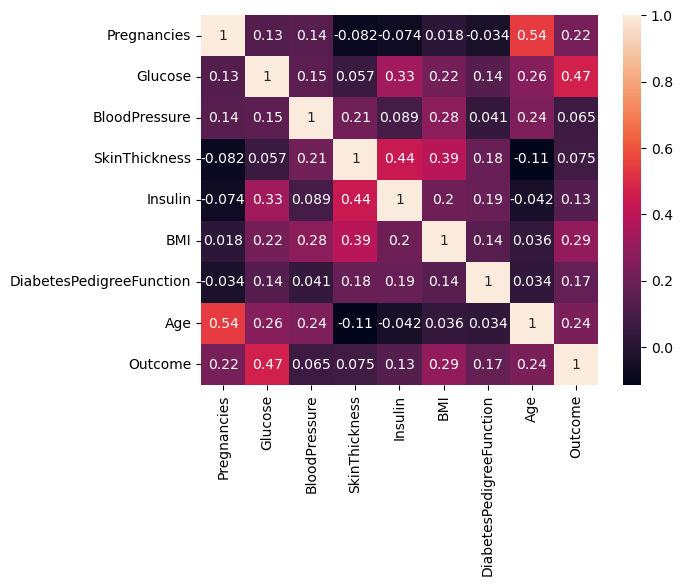

In [13]:
sns.heatmap(diab.corr(),annot = True)

In [14]:
# Feature and Tasks 

In [15]:
X = diab.drop("Outcome", axis = 1)
y = diab["Outcome"]

In [16]:
from sklearn.model_selection import train_test_split 
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
# Model Building 

In [18]:
model = LogisticRegression(max_iter = 1000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

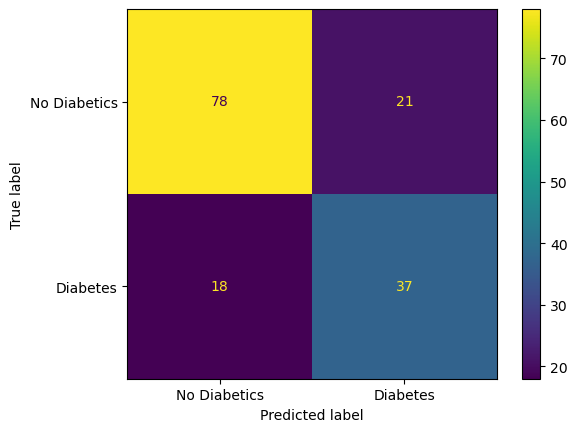

In [19]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ["No Diabetics", "Diabetes"])
disp.plot()
plt.show()

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [21]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)


Accuracy: 0.7467532467532467


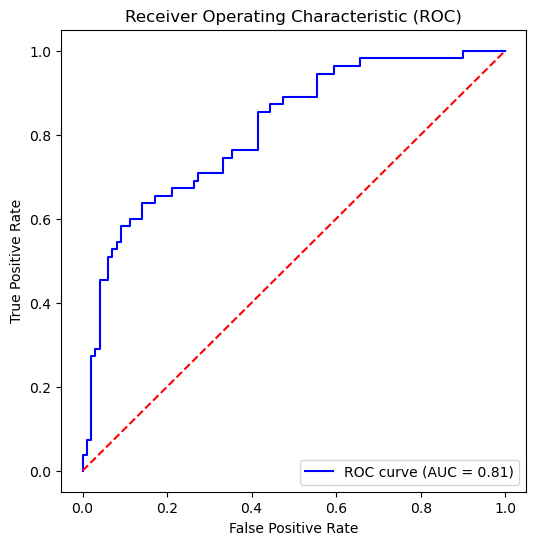

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities
y_pred_prob = model.predict_proba(X_test)[:,1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [33]:
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.7303030303030302


In [37]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]}).sort_values(by = 'Coefficient', ascending=False)
coef_df

,Feature,Coefficient
6,DiabetesPedigreeFunction,0.626558
5,BMI,0.102605
0,Pregnancies,0.064375
7,Age,0.037090
1,Glucose,0.034093
3,SkinThickness,0.003291
4,Insulin,-0.001803
2,BloodPressure,-0.013881


In [44]:
#Positive coefficient → increases diabetes probability

#Negative coefficient → decreases probability

In [103]:
!pip install streamlit

In [105]:
import pickle 

with open("diabetes_model.pkl", "wb") as file:
    pickle.dump(model, file)

In [109]:
model = pickle.load(open("diabetes_model.pkl","rb"))

In [111]:
# Interview Question

In [ ]:
                                          #Precision
#Definition: Out of all instances predicted as positive, how many are actually positive
#Focus: Prediction correctness
#High precision means few false positives
                                        #Recall
#Definition: Out of all actual positive instances, how many were correctly predicted
#Focus: Capturing all positives
#High recall means few false negatives

In [ ]:
#Cross-Validation
#Cross-validation is a model evaluation technique used to assess how well a model generalizes to unseen data.
#The most common type is k-fold cross-validation:
#The dataset is split into k equal parts (folds).
#The model is trained on k−1 folds and tested on the remaining fold.
                     #Why Cross-Validation is Important in Binary Classification
#Prevent overfitting
# Reliable Performance Estimation
# Handle class Imbalance Better